# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [1]:
# Your code here

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

In [2]:
boston = pd.read_csv('/Users/nelly/dataV2-labs/module-3/Problems-in-ML/data/boston_data.csv')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [3]:
boston.shape

(404, 14)

In [4]:
# CRIM - per capita crime rate by town
# ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS - proportion of non-retail business acres per town.
# CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
# NOX - nitric oxides concentration (parts per 10 million)
# RM - average number of rooms per dwelling
# AGE - proportion of owner-occupied units built prior to 1940
# DIS - weighted distances to five Boston employment centres
# RAD - index of accessibility to radial highways
# TAX - full-value property-tax rate per $10,000
# PTRATIO - pupil-teacher ratio by town
# B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# LSTAT - % lower status of the population
# MEDV - Median value of owner-occupied homes in $1000's


In [5]:
# Your plots here

boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     404 non-null    float64
 1   zn       404 non-null    float64
 2   indus    404 non-null    float64
 3   chas     404 non-null    float64
 4   nox      404 non-null    float64
 5   rm       404 non-null    float64
 6   age      404 non-null    float64
 7   dis      404 non-null    float64
 8   rad      404 non-null    float64
 9   tax      404 non-null    float64
 10  ptratio  404 non-null    float64
 11  black    404 non-null    float64
 12  lstat    404 non-null    float64
 13  medv     404 non-null    float64
dtypes: float64(14)
memory usage: 44.3 KB


In [6]:
boston.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [7]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.730912,10.509901,11.189901,0.069307,0.556710,6.30145,68.601733,3.799666,9.836634,411.688119,18.444554,355.068243,12.598936,22.312376
std,8.943922,22.053733,6.814909,0.254290,0.117321,0.67583,28.066143,2.109916,8.834741,171.073553,2.150295,94.489572,6.925173,8.837019
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.56100,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.000000,0.453000,5.90275,45.800000,2.087875,4.000000,281.000000,17.375000,374.710000,7.135000,17.100000
50%,0.253715,0.000000,9.795000,0.000000,0.538000,6.23050,76.600000,3.207450,5.000000,330.000000,19.000000,391.065000,11.265000,21.400000
75%,4.053158,12.500000,18.100000,0.000000,0.631000,6.62925,94.150000,5.222125,24.000000,666.000000,20.200000,396.007500,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000,50.000000


<AxesSubplot:>

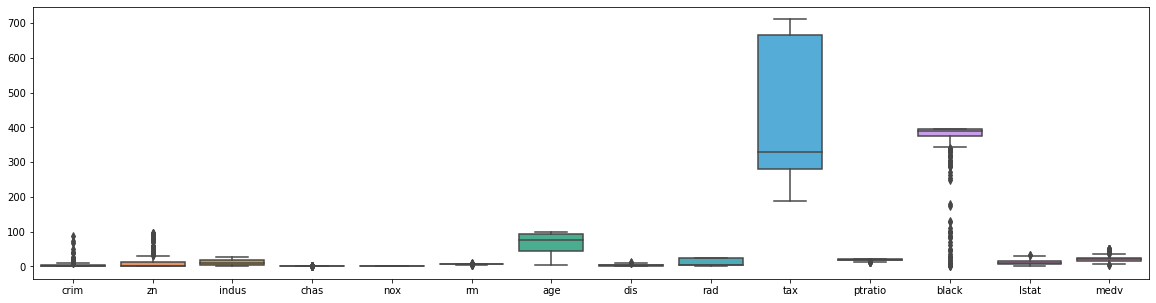

In [8]:
plt.figure(figsize=(20,5))
sns.boxplot(data=boston)

<AxesSubplot:>

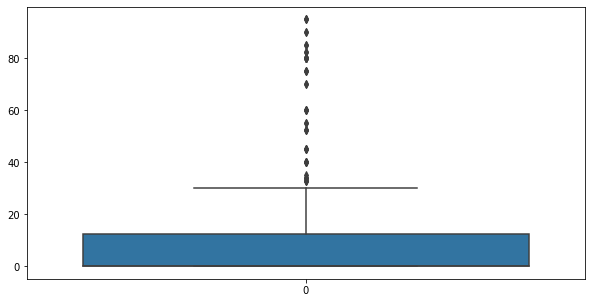

In [9]:
plt.figure(figsize=(10,5))
sns.boxplot(data=boston['zn'])

# normally outliers are twice as far as the whisker ( so here more than 50)

<AxesSubplot:>

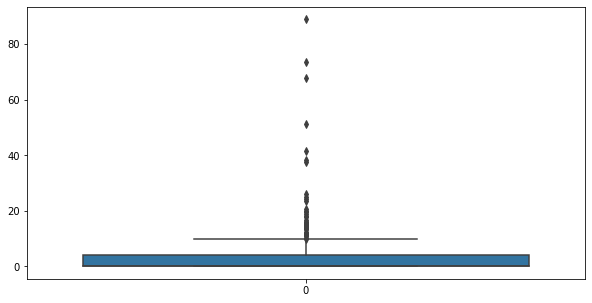

In [10]:
plt.figure(figsize=(10,5))
sns.boxplot(data=boston['crim'])


<AxesSubplot:>

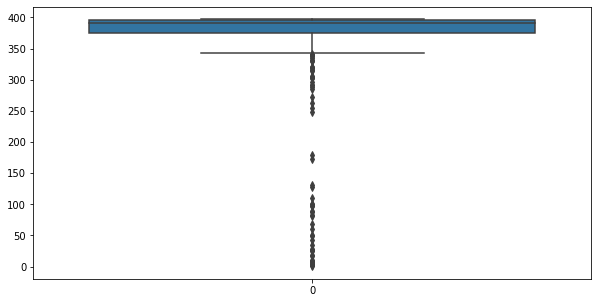

In [11]:
plt.figure(figsize=(10,5))
sns.boxplot(data=boston['black'])

In [12]:
boston.loc[boston['black'] < 1]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
241,6.71772,0.0,18.1,0.0,0.713,6.749,92.6,2.3236,24.0,666.0,20.2,0.32,17.44,13.4


In [13]:
# Not a good idea because it is possible in Boston
# boston['black'].apply(lambda x: (x*100) if x ==0.32 else x)

In [14]:
boston['black'].describe()

count    404.000000
mean     355.068243
std       94.489572
min        0.320000
25%      374.710000
50%      391.065000
75%      396.007500
max      396.900000
Name: black, dtype: float64

In [15]:
boston.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.194770,0.404249,-0.060688,0.405290,-0.172226,0.349288,-0.376493,0.603044,0.565047,0.292092,-0.377436,0.428940,-0.400956
zn,-0.194770,1.000000,-0.532268,-0.037290,-0.497114,0.302404,-0.546587,0.659018,-0.311313,-0.289332,-0.371315,0.176350,-0.412075,0.355608
indus,0.404249,-0.532268,1.000000,0.059928,0.760913,-0.353589,0.630048,-0.702583,0.616375,0.722828,0.356549,-0.378189,0.608309,-0.501698
chas,-0.060688,-0.037290,0.059928,1.000000,0.100650,0.090146,0.084852,-0.103124,-0.022561,-0.043708,-0.121835,0.042580,-0.041061,0.141400
nox,0.405290,-0.497114,0.760913,0.100650,1.000000,-0.266114,0.728882,-0.762469,0.612115,0.660607,0.166715,-0.393876,0.587573,-0.439225
rm,-0.172226,0.302404,-0.353589,0.090146,-0.266114,1.000000,-0.210589,0.178700,-0.173222,-0.241733,-0.323330,0.128410,-0.578025,0.683541
age,0.349288,-0.546587,0.630048,0.084852,0.728882,-0.210589,1.000000,-0.734915,0.467341,0.503830,0.231820,-0.276469,0.602001,-0.390863
dis,-0.376493,0.659018,-0.702583,-0.103124,-0.762469,0.178700,-0.734915,1.000000,-0.503471,-0.526938,-0.206016,0.306445,-0.500912,0.264876
rad,0.603044,-0.311313,0.616375,-0.022561,0.612115,-0.173222,0.467341,-0.503471,1.000000,0.917344,0.487733,-0.468700,0.499279,-0.423508
tax,0.565047,-0.289332,0.722828,-0.043708,0.660607,-0.241733,0.503830,-0.526938,0.917344,1.000000,0.465997,-0.462250,0.542732,-0.495792


<AxesSubplot:>

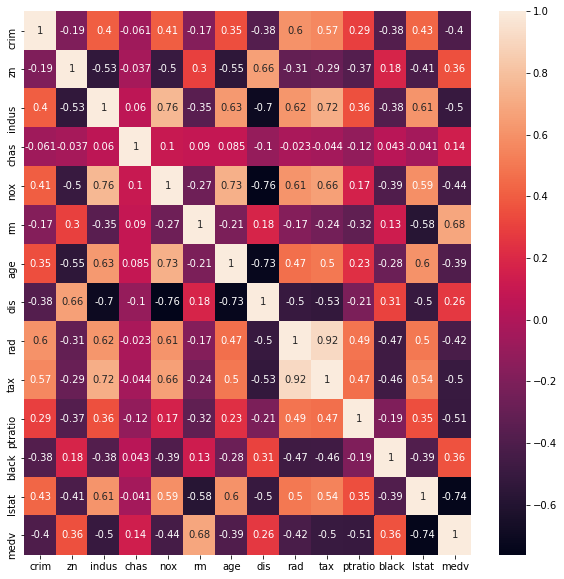

In [16]:
boston1 = boston[['medv', 'tax', 'rm', 'lstat']]

plt.subplots(figsize=(10,10))
sns.heatmap(boston.corr(), annot=True)

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [17]:
# Your response here


# ⭕️ High POSITIVE correlations :

# (.68 ) MEDV and RM  average number of rooms , so the more rooms the more expensive 
# Yes, it makes sense.

# (.92 ) TAX and RAD access to radial highways , the easiest access to highways the more expensive
# Yes, it makes sense.

# ⭕️ High NEGATIVE correlations:

# (-.74) MEDV and LSTAT which is the lower status of the population, so the lower the status the lower the prices 
# I think is also normal since for a person with low status is more likely to live in cheaper neighbourhoods.


# Interesting:

# The correlation between the population being black and the lower status of the population

# (-.39) Correlation between black population and low status population



### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

In [18]:
# Your response here

# I plotted the heatmap for every variable


### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [19]:
# Your code here

# MEDV - Median value of homes in $1000's

boston['medv'].describe()

count    404.000000
mean      22.312376
std        8.837019
min        5.000000
25%       17.100000
50%       21.400000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [20]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """

    # Your code here:
    
    score = r2_score(y_true, y_predict)
    return score

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [21]:
# Your code here

boston_x = boston[['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','black','lstat']]
boston_y = boston['medv']


X_train, X_test, y_train, y_test = train_test_split(boston_x, boston_y, test_size=0.2)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

In [22]:
'''
The random forest combines hundreds or thousands of decision trees, 
trains each one on a slightly different set of the observations, 
splitting nodes in each tree considering a limited number of the features. 
The final predictions of the random forest are made by averaging the predictions of each individual tree.
'''

'\nThe random forest combines hundreds or thousands of decision trees, \ntrains each one on a slightly different set of the observations, \nsplitting nodes in each tree considering a limited number of the features. \nThe final predictions of the random forest are made by averaging the predictions of each individual tree.\n'

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [23]:
# max_depth parameter to 2

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

# split 

boston_x = boston[['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','black','lstat']]
boston_y = boston['medv']

X_train, X_test, y_train, y_test = train_test_split(boston_x, boston_y, test_size=0.2)

# scale

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# build model

regressor2 = RandomForestRegressor(max_depth=2, random_state=0)

# fit
regressor2.fit(X_train, y_train)

# predict
y_pred2 = regressor2.predict(X_test)

# evaluate


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

Mean Absolute Error: 3.3983715500719467
Mean Squared Error: 21.635781384155226
Root Mean Squared Error: 4.651427886590872


In [24]:
# max_depth parameter to 4


sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# build model

regressor4 = RandomForestRegressor(max_depth=4, random_state=0)

# fit
regressor4.fit(X_train, y_train)

# predict
y_pred4 = regressor4.predict(X_test)

# evaluate


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred4))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred4))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))

Mean Absolute Error: 2.966864803854519
Mean Squared Error: 19.639475104052085
Root Mean Squared Error: 4.4316447402800785


In [25]:
# max_depth parameter to 6

# scale

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# build model

regressor6 = RandomForestRegressor(max_depth=6, random_state=0)

# fit
regressor6.fit(X_train, y_train)

# predict
y_pred6 = regressor6.predict(X_test)

# evaluate


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred6))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred6))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred6)))

Mean Absolute Error: 2.785347487227854
Mean Squared Error: 18.313404863634233
Root Mean Squared Error: 4.279416416245822


Now, plot the score for each tree on the training set and on the testing set.

In [26]:
# max_depth parameter to 8

# scale

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# build model

regressor8 = RandomForestRegressor(max_depth=8, random_state=0)

# fit
regressor8.fit(X_train, y_train)

# predict
y_pred8 = regressor8.predict(X_test)

# evaluate


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred8))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred8))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred8)))

Mean Absolute Error: 2.775707476982107
Mean Squared Error: 17.663299883446612
Root Mean Squared Error: 4.202772880307311


In [27]:
# max_depth parameter to 10


# scale

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# build model

regressor10 = RandomForestRegressor(max_depth=10, random_state=0)

# fit
regressor10.fit(X_train, y_train)

# predict
y_pred10 = regressor10.predict(X_test)

# evaluate : how far I am from the prediction


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred10))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred10)) #how far I am from the prediction/ OBS
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred10)))

Mean Absolute Error: 2.755252390718049
Mean Squared Error: 18.002324568564738
Root Mean Squared Error: 4.242914631307674


What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [28]:
# How far I am from the prediction : the best is with max_depth 8


print('Mean Squared Error  max_depth 2 :', metrics.mean_squared_error(y_test, y_pred2))
print('Mean Squared Error  max_depth 4 :', metrics.mean_squared_error(y_test, y_pred4))
print('Mean Squared Error  max_depth 6 :', metrics.mean_squared_error(y_test, y_pred6))
print('Mean Squared Error  max_depth 8 :', metrics.mean_squared_error(y_test, y_pred8))
print('Mean Squared Error  max_depth 10 :',metrics.mean_squared_error(y_test, y_pred10))

Mean Squared Error  max_depth 2 : 21.635781384155226
Mean Squared Error  max_depth 4 : 19.639475104052085
Mean Squared Error  max_depth 6 : 18.313404863634233
Mean Squared Error  max_depth 8 : 17.663299883446612
Mean Squared Error  max_depth 10 : 18.002324568564738


### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [29]:
# Your response here

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [30]:
# Your response here

# The best is with max_depth 8

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [31]:
# Your response here